<a href="https://colab.research.google.com/github/byKakayo/calc_num_py/blob/main/KarenKaoriYonea_10349471_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Mínimos Quadrados



Polinômio de grau:  1
Erro: 5123.651934007506
População em 2021: 176.17946182454762 

Polinômio de grau:  2
Erro: 249.30911391420887
População em 2021: 229.7127276296742 

Polinômio de grau:  3
Erro: 236.34823060489546
População em 2021: 233.6905915949028 

Polinômio de grau:  4
Erro: 134.3383429203415
População em 2021: 216.0093905068934 

Polinômio de grau:  5
Erro: 112.40008430604132
População em 2021: 206.55935653857887 

Polinômio de grau:  6
Erro: 636.8754566020185
População em 2021: 201.45198593757925 



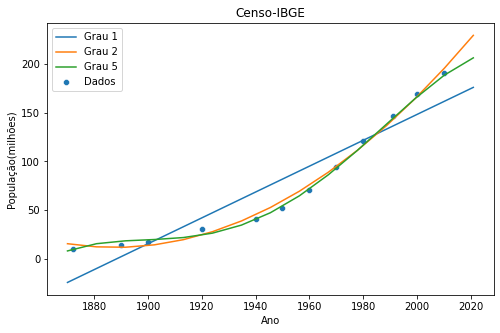

In [ ]:
#Bibliotecas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Dados
x = np.array([1872, 1890, 1900, 1920, 1940, 1950, 1960, 1970, 1980, 1991, 2000, 2010])
y = np.array([9.9, 14.3, 17.4, 30.6, 41.2, 51.9, 70.9, 94.5, 121.1, 146.9, 169.5, 190.7])


#Visualização dos dados
plt.figure(figsize=(8,5))
sns.scatterplot(x,y, label="Dados");
plt.title('Censo-IBGE')
# Set x-axis label
plt.xlabel('Ano')
# Set y-axis label
plt.ylabel('População(milhões)')


#Mínimos Quadrados
def Least_Squares(x, y, grau):
  shape = (len(x), grau + 1)
  A = np.zeros( shape )

  for k in range(0, grau+1):
    A[:,k] = x**k

  p = (np.linalg.inv( A.T @ A ) @ A.T) @ y

  return p


#Erro quadrático
def deviation(y, yp):
  err = np.sum((y-yp)**2)
  return err


#Gerar pontos 
def f(x, p):
  y = np.zeros(len(x))
  for i in range(0, len(p+1)):
    y += p[i]*(x**i)
  return y


#Para polinômios de grau 1 até 5
for i in range(1, 7):
  print("Polinômio de grau: ", i)

  #Coeficientes do mínimos quadrados
  p = Least_Squares(x, y, i)

  #Erro quadrático
  print("Erro:", deviation(y,f(x, p)))
  
  xp = np.linspace(1870, 2021, 15)

  #Valores para o fitting
  yp = f(xp, p)

  #Plot do fitting
  if i in (1,2,5):
    sns.lineplot(xp, yp, label="Grau "+str(i))

  #População de 2021
  print("População em 2021:", yp[-1], "\n")

a) Analisando as aproximações polinomiais dos dados, podemos inferir que a melhor aproximação é a de grau 5, pois aumentando o grau temos uma diminuição do erro quadrático, porém ao chegarmos em grau 6 temos um brusco aumento do erro. Sendo assim, é possível afirmar que não necessariamente um aumento do grau leve a uma melhora na aproximação. 

b) Para a melhor aproximação encontrada temos que a população estimada do Brasil em 2021 seria: 206,56 milhões. 

ps: As populações estimadas para os outros graus menores que 7 estão no código acima. 

#2. Equações Diferenciais Ordinárias

Pico da epidemia: dia 14 
Total de infectados: 565


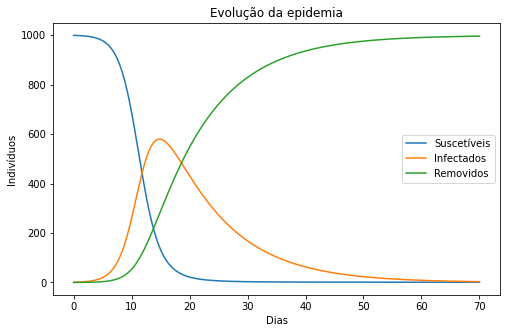

In [ ]:
#Bibliotecas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Runge-Kutta ordem 4
def KR4(f, y0, h, n):
  # res recebe todos yn
  res = np.zeros( (int(n//h), len(y0)) )
  res[0,:] = y0

  # Metodo Runge-Kutta
  for t in range(1, int(n//h)):
    # K's para cada equação do sistema
    k = np.zeros( (len(y0), 4) )
    for i in range(4):
      k[:,i] = h*f(y0 + k[:,i-1]*h/2)
    y0 = y0 + (k[:,0] + 2*k[:,1] + 2*k[:,2] + k[:,3])/6
    # Adiciona yn em res
    res[t,:] = y0
  
  return res

# função que retorna o dia do pico e o número de infectados
def pico(result, h):
  for d, y in enumerate(result):
    if y[0]-y[2] <= 0:
      return round(d*h), round(y[1])
  return 0, 0

# Função com os parametros do item a
def fa(yt):
  a, b = 0.1, 0.0007
  st, it, rt = yt
  yt1 = np.zeros(3)

  yt1[0] = -b*st*it
  yt1[1] =  b*st*it -a*it
  yt1[2] =  a*it
  
  return yt1

S0, I0, R0 = 999, 1, 0
h, n = 0.001, 70

#Visualização dos dados
plt.figure(figsize=(8,5))
plt.title('Evolução da epidemia')
# Set x-axis label
plt.xlabel('Dias')
# Set y-axis label
plt.ylabel('Indivíduos')


result = KR4(fa, (S0, I0, R0), h, n)
print("Pico da epidemia: dia", pico(result, h)[0], "\nTotal de infectados:", pico(result, h)[1])
sns.lineplot(np.linspace(0, 70, result.shape[0]), result[:,0], label="Suscetíveis");
sns.lineplot(np.linspace(0, 70, result.shape[0]), result[:,1], label="Infectados");
sns.lineplot(np.linspace(0, 70, result.shape[0]), result[:,2], label="Removidos");

a) Pico da pandemia no dia 14 com 565 infectados.

Pico da epidemia: dia 26 
Total de infectados: 399


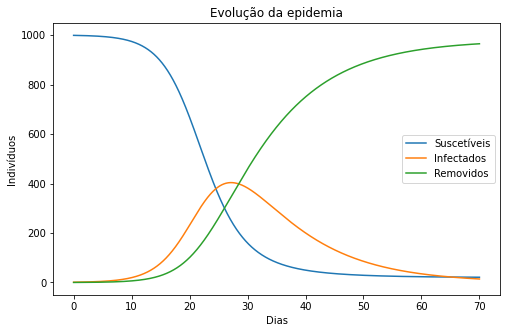

In [ ]:
# função com os parametros do item b
def fb(yt):
  a, b = 0.1, 0.0004
  st, it, rt = yt
  yt1 = np.zeros(3)

  yt1[0] = -b*st*it
  yt1[1] =  b*st*it -a*it
  yt1[2] =  a*it
  
  return yt1

S0, I0, R0 = 999, 1, 0
h, n = 0.001, 70

#Visualização dos dados
plt.figure(figsize=(8,5))
plt.title('Evolução da epidemia')
# Set x-axis label
plt.xlabel('Dias')
# Set y-axis label
plt.ylabel('Indivíduos')


result = KR4(fb, (S0, I0, R0), h, n)
print("Pico da epidemia: dia", pico(result, h)[0], "\nTotal de infectados:", pico(result, h)[1])
sns.lineplot(np.linspace(0, 70, result.shape[0]), result[:,0], label="Suscetíveis");
sns.lineplot(np.linspace(0, 70, result.shape[0]), result[:,1], label="Infectados");
sns.lineplot(np.linspace(0, 70, result.shape[0]), result[:,2], label="Removidos");

b) Em comparação ao item a) há um deslocamento do pico da epidemia para a direita e uma diminuição da quantidade de infectados nesse pico. No sentido real, esse deslocamento seria favorável no controle da epidemia, no sentido de gestão, há mais tempo até que ocorra o pico e menos casos simultâneos.  

#3. Zeros de funções e sistemas não lineares

In [25]:
# função que descreve a elevação
def p(x):
  return -x**4 +7.7*x**3 -18*x**2 +13.6*x

# função que descreve o lançamento do projetil
def q(x):
  return -x**2 +5*x +0.75

# função que calcula a distancia entre o projetil e a elevação
def dist_pq(x):
  return p(x) - q(x)

# derivada da função de distancia
def dx_dist_pq(x):
  return -4*x**3 +3*7.7*x**2 -2*19*x +18.6

# metodo da bissecção
def metodobisseccao(f, a, b, tol, kmax):
  # x recebe o valor médio de a e b
  x = (a+b)/2
  # erro inicial
  erro = 2*tol
  count = 0
  # loop de iteração
  while erro > tol and count < kmax:
    # condição para atribuir o valor média
    if f(a)*f(x) < 0:
      b = x
    else:
      a = x
    x0 = x
    x = (a+b)/2
    erro = abs(x-x0)
    count += 1
  # return o x encontrado e a quantidade de iterações
  return x, count

# metodo de newton
def metododenewton(f, df, x0, tol, kmax):
  count = 0
  # loop de iterações
  while abs(f(x0)/df(x0)) > tol and count < kmax:
    x0 = x0 - f(x0)/df(x0)
    count += 1
  # return o x encontrado e a quantidade de iterações
  return x0, count

bissec_raiz, bissec_count = metodobisseccao(dist_pq, 3.15, 3.2, 0.001, 200)
newton_raiz, newton_count = metododenewton(dist_pq, dx_dist_pq, 3.15, 0.001, 200)
raiz = 3.173
altura = p(raiz)

print("Metodo da bissecção:")
print(" Intervalo inicial: (3.15, 3.2)")
print(" - raiz:", bissec_raiz)
print(" - iterações:", bissec_count)
print(" - Altura:", p(bissec_raiz))

print("\nMetodo de newton:")
print(" Chute inicial: 3.15")
print(" - raiz:", newton_raiz)
print(" - iterações:", newton_count)
print(" - Altura:", p(newton_raiz))

print("\nValor esperado:")
print(" - raiz:", raiz)
print(" - Altura:", altura)

Metodo da bissecção:
 Intervalo inicial: (3.15, 3.2)
 - raiz: 3.17265625
 - iterações: 5
 - Altura: 6.546101510113125

Metodo de newton:
 Chute inicial: 3.15
 - raiz: 3.1734091301310507
 - iterações: 83
 - Altura: 6.549232490227666

Valor esperado:
 - raiz: 3.173
 - Altura: 6.547531771859028


Para ambos os métodos foi utilizado o critério de parada, precisão 0,001, então o que temos de maior diferença nos resultados são os chutes iniciais e quantidade de iterações.

Dado o método, podemos dizer que o da bissecção têm uma dependência maior do intervalo inicial escolhido enquanto o de Newton depende mais da função matemática em si, pois é utilizada sua derivada, e foram necessárias mais iterações para chegar à mesma precisão do método da bissecção.

No geral, para ambos os métodos é preciso saber a previsão para o resultado de forma a ajustar os parâmetros.